# import essential Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import data


In [3]:
housing = pd.read_csv("E:/ML Ops/Project/datasets/housing.csv")
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
housing.info() #Used to get some basic information about the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
#insights from above information
# one of the column has non-numeric value
#Lets see insights from the data


In [6]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [7]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


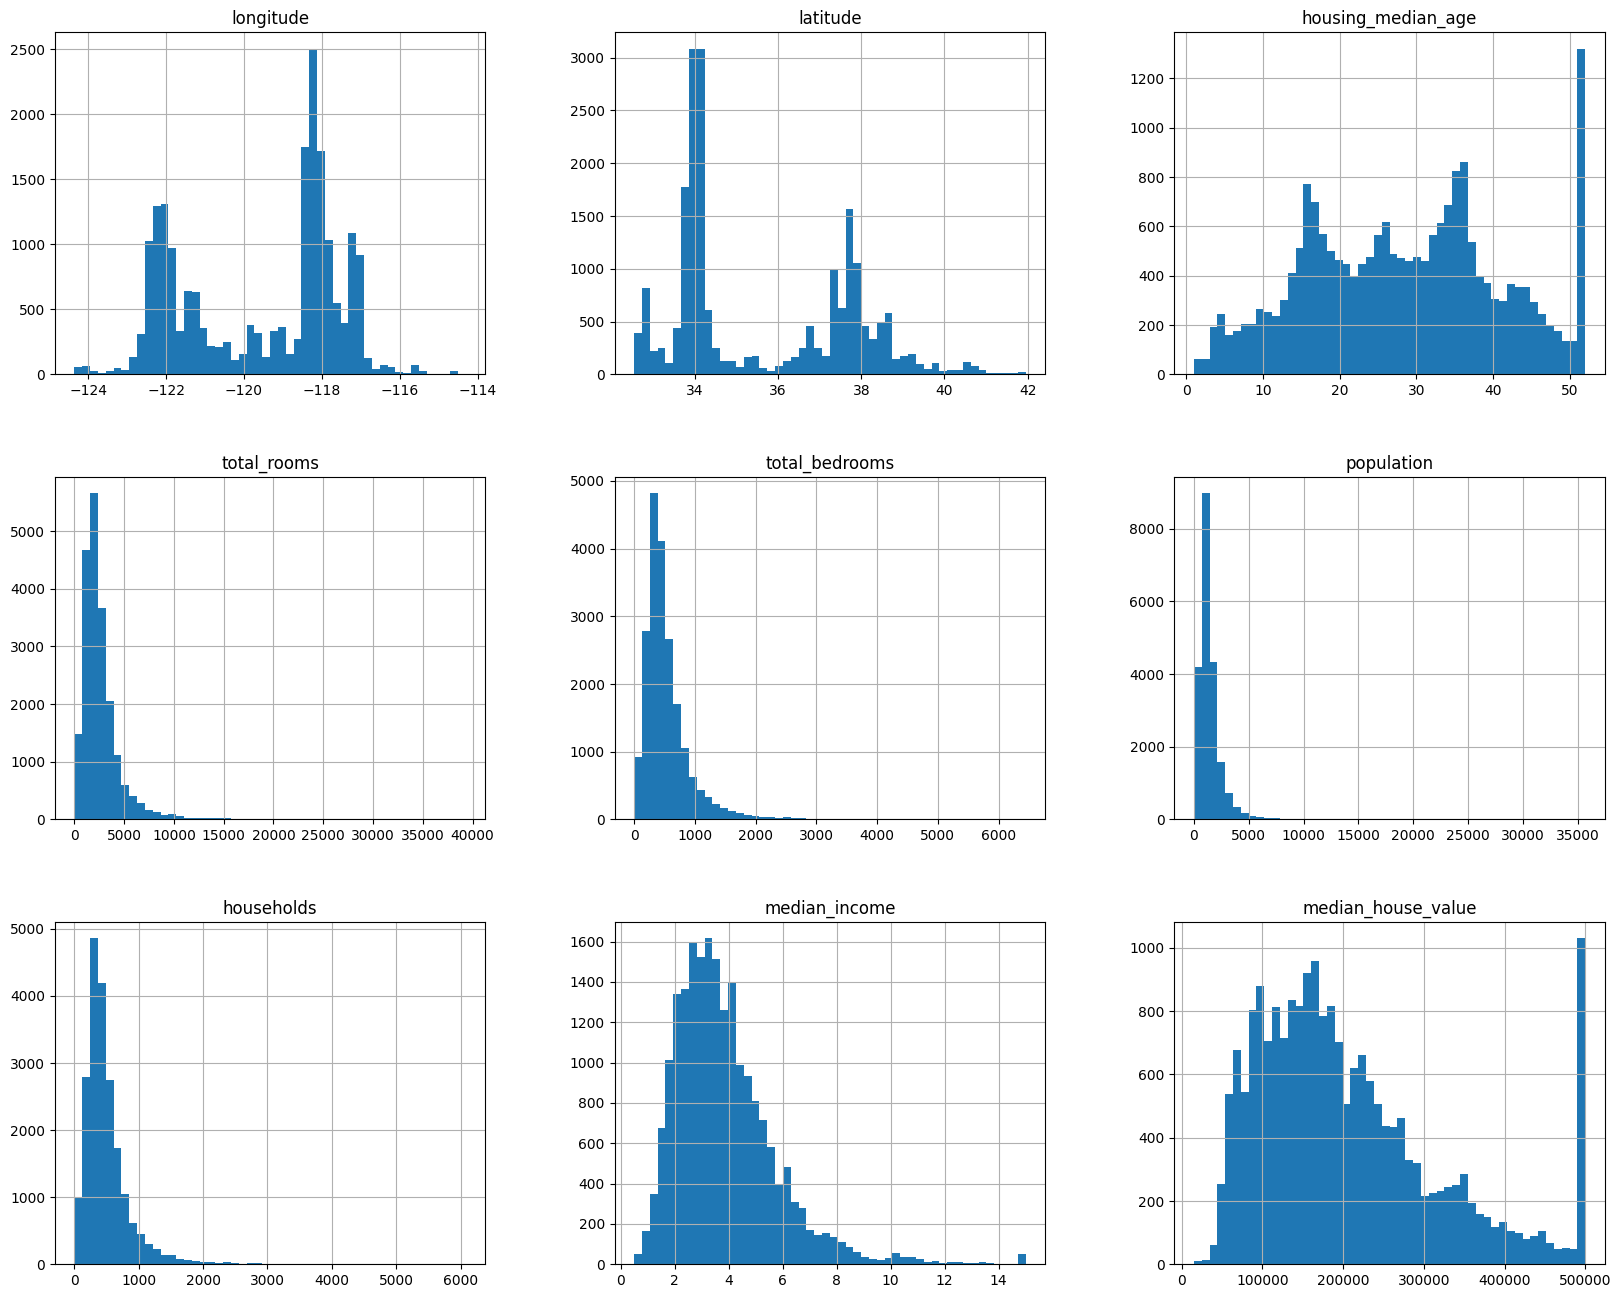

In [8]:
%matplotlib inline
housing.hist(bins = 50 , figsize = (20,16))
plt.show()

## Create a test Data set

In [9]:
def split_train_test(data,test_ratio):
    np.random.seed(42)
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices],data.iloc[test_indices]
train_set, test_set = split_train_test(housing, 0.2)
print(len(train_set))
print(len(test_set))

16512
4128


In [10]:
#import from scikit-learn and then split the data
from sklearn.model_selection import train_test_split
train_set, test_set= train_test_split(housing, test_size = 0.2, random_state=42)
print(len(train_set))
print(len(test_set))

16512
4128


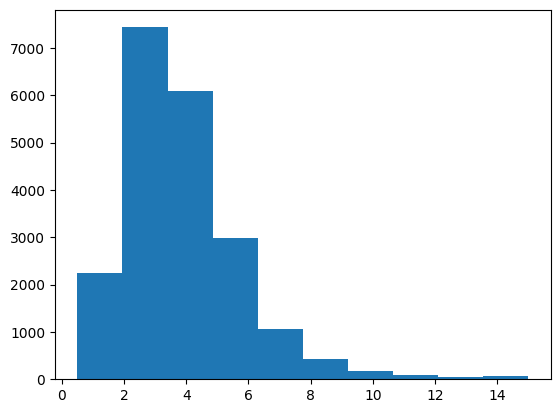

In [11]:
plt.hist(x=housing["median_income"])
plt.show()

<Axes: >

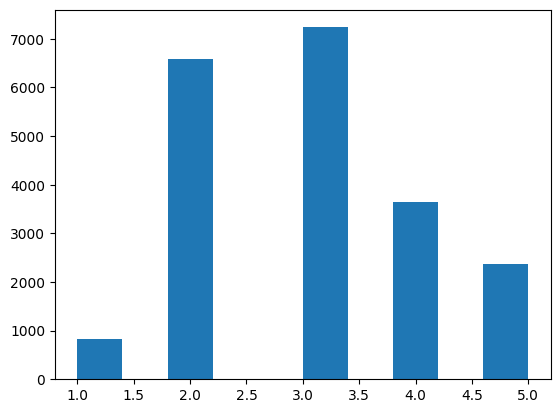

In [12]:
#the above code will give the random samples 
# bur we need that our test set contains alll the categorie
# we have to do stratified smapling
#In-sights
#we see most of the people lie in the range of 1.5 to 6 range
# Let us make 5 categories for this
housing["income_cat"] = pd.cut(housing["median_income"],bins = [0,1.5,3.0,4.5,6.0, np.inf], labels = [1,2,3,4,5])
housing["income_cat"].hist(grid = False)

In [13]:
#So, let us make the test data set for stratified sampling
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2 , random_state = 42)
for train_index,  test_index in split.split(housing,housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]
strat_test_set["income_cat"].value_counts() / len(strat_test_set)  

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_cat, dtype: float64

In [14]:
#Since we will not use the stratified sampling here, 
# let us remove the stratified test data set
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat",axis=1 , inplace=True)


## Discover and Visualize the data

<Axes: xlabel='longitude', ylabel='latitude'>

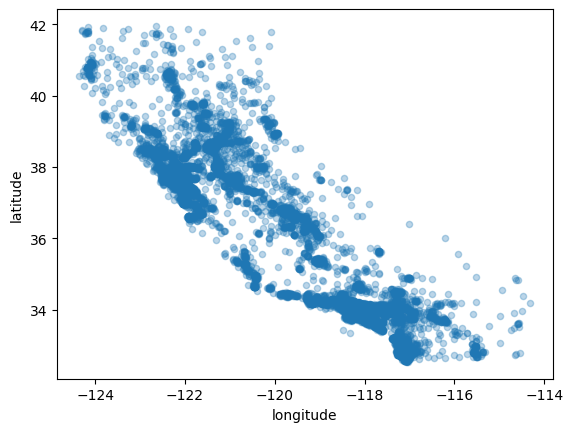

In [15]:
#to avoid any harm to the data set we will use the copy of the data
housing = strat_train_set.copy()
housing.plot(kind="scatter" , x = "longitude" , y = "latitude",alpha = 0.3)

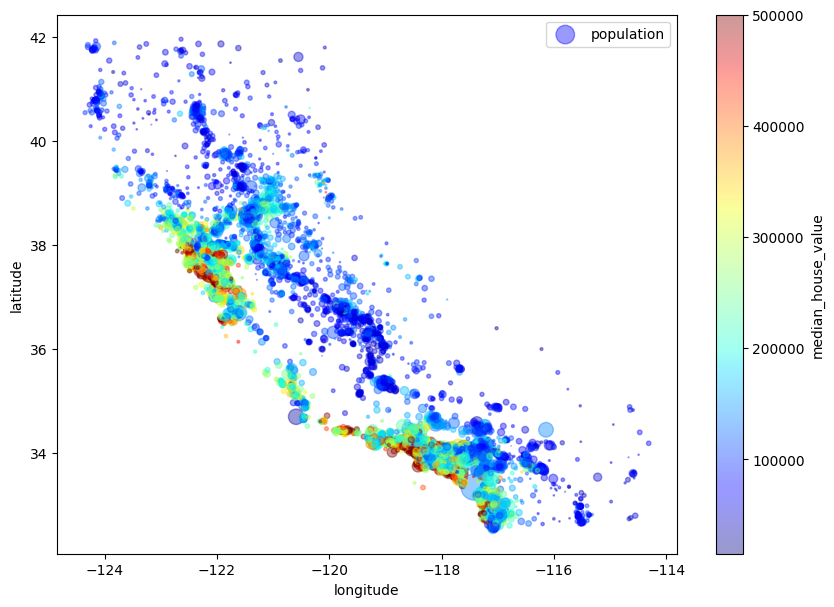

In [16]:
housing.plot(kind="scatter" , x = "longitude" , y = "latitude" , alpha = 0.4, s = housing["population"]/100 , label = "population" , figsize=(10,7) , c = "median_house_value" , cmap = plt.get_cmap("jet") , colorbar= True)
plt.legend()
#here, we will use the color-bar for the house pprices ,  district's population which ranges from blue to red

## Looking for correlations

In [17]:
corr_matrix = housing.corr()
#corr()  calculates the std correlation coefficient or Pearson's r
corr_matrix["median_house_value"].sort_values(ascending=False)

C:\Users\GOD WORLD\AppData\Local\Temp\ipykernel_15988\2592524712.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = housing.corr()


median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

In [18]:
# 1 :  " strong possitive correlation"
# -1:   "strong negative correlation "
# 0 : " no strong correlation or no correlation"

array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='total_rooms', ylabel='median_house_value'>,
        <Axes: xlabel='housing_median_age', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='total_rooms', ylabel='median_income'>,
        <Axes: xlabel='housing_median_age', ylabel='median_income'>],
       [<Axes: xlabel='median_house_value', ylabel='total_rooms'>,
        <Axes: xlabel='median_income', ylabel='total_rooms'>,
        <Axes: xlabel='total_rooms', ylabel='total_rooms'>,
        <Axes: xlabel='housing_median_age', ylabel='total_rooms'>],
       [<Axes: xlabel='median_house_value', ylabel='housing_median_age'>,
        <Axes: xlabel='median_income', ylabel='housing_median_age'>,
        <Axes: xlabel='total_rooms', ylabel='housi

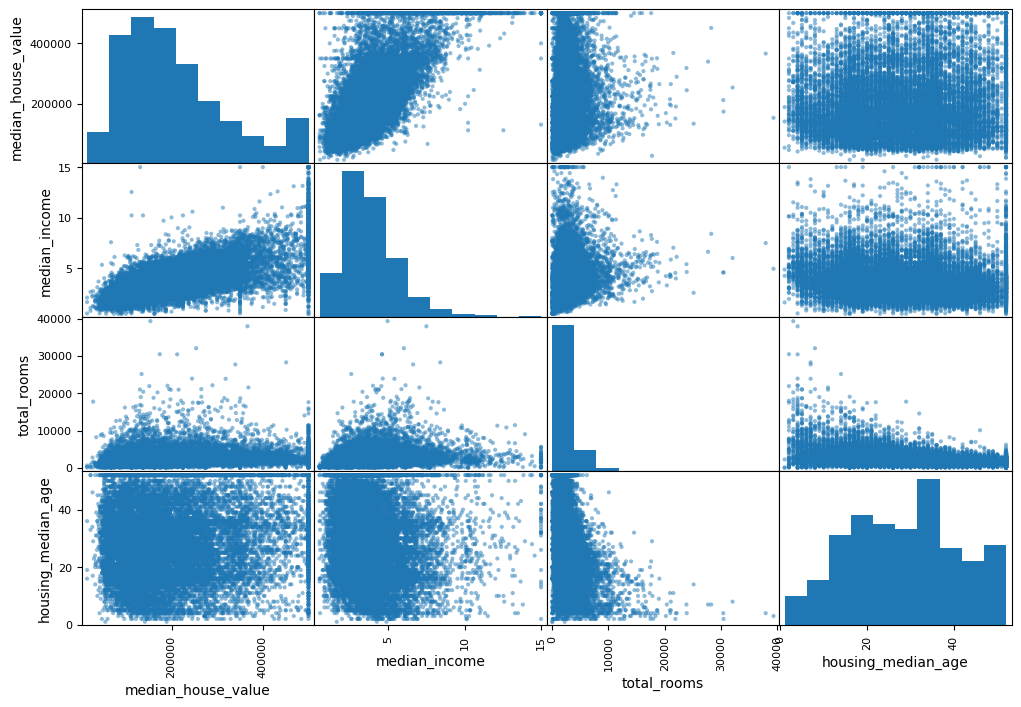

In [19]:
#another way to see correlation is to use the scatter_matrix
from pandas.plotting import scatter_matrix
attributes = ["median_house_value" , "median_income" , "total_rooms", "housing_median_age"]
scatter_matrix(housing[attributes] , figsize = (12,8))

# Prepare Data for ML Algo

## Data Cleaning

In [20]:
housing = strat_train_set.drop("median_house_value" , axis=1)
housing_labels = strat_train_set["median_house_value"].copy()
#here, we will drop the target value because we dont want to apply the transformation to the target values


In [21]:
#to fill the missing values with the median value we will use Imputer
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = "median")
#now since median can only be found on the numerical data, we will drop the object data
housing_num = housing.drop("ocean_proximity" , axis = 1)
imputer.fit(housing_num)
#imputer has tsored the median of each column in instance variable called statistics
imputer.statistics_
#note it has yet not put the missing values

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [22]:
housing_num.median().values

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [23]:
#to replace the missing values
X = imputer.transform(housing_num)
# X is a numpy array
#convert it into pandas dataframe
housing_tr = pd.DataFrame(X , columns = housing_num.columns)
housing_tr.count()

longitude             16512
latitude              16512
housing_median_age    16512
total_rooms           16512
total_bedrooms        16512
population            16512
households            16512
median_income         16512
dtype: int64

## Handling text and Categorical attribute

In [24]:
housing_cat = housing[["ocean_proximity"]]
housing_cat.head(10)

,ocean_proximity
12655,INLAND
15502,NEAR OCEAN
2908,INLAND
14053,NEAR OCEAN
20496,<1H OCEAN
1481,NEAR BAY
18125,<1H OCEAN
5830,<1H OCEAN
17989,<1H OCEAN
4861,<1H OCEAN


In [25]:
#Use of OrdinalEncoder
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]
#here, we have got the order of number for each of the 
# categorical variable and then it says that 
# cat for 1 is related to 2 and so on and it is not always true, so
# we will use OnHotEncoder()
#categories_ is the instance variable which has the list of categories


array([[1.],
       [4.],
       [1.],
       [4.],
       [0.],
       [3.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [26]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [27]:
#Use of One hot Encoder
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot
#stores only the location of 1 otherwise storing the zeroes would be wasteful


<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [28]:
housing_cat_1hot.toarray()

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [29]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

## Custom Transformers

In [30]:
from sklearn.base import BaseEstimator, TransformerMixin

In [31]:
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self # nothing else to do
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
            bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

## Feature Scaling

In [32]:
#Standardization is much less effected by the outliers than normalization
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
num_pipeline = Pipeline([
    ('imputer' , SimpleImputer(strategy = 'median')),
    ('attribs_adder' , CombinedAttributesAdder()),
    ('std_scaler', StandardScaler())
])
housing_num_tr = num_pipeline.fit_transform(housing_num)


In [33]:
#Till now, we have handled the categorical and numerical values sep
#Now let us use the column Transformer from scikitlearn
from sklearn.compose import ColumnTransformer
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]
full_pipeline  = ColumnTransformer([  #constructor need name, tranformer and list of names
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder() , cat_attribs),
])
housing_prepared = full_pipeline.fit_transform(housing)
#columntranformer returns either dense or sparse matrix based 
# on the given data and default threshold= 0.3
# OneHotEncoder returns sparse while nums_pipeline return dense matrix

# Select and Train a model

In [34]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared,  housing_labels)

LinearRegression()

In [35]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print("Predictions: ", lin_reg.predict(some_data_prepared))
print("Labels: ", lin_reg.predict(some_data_prepared))

Predictions:  [ 85657.90192014 305492.60737488 152056.46122456 186095.70946094
 244550.67966089]
Labels:  [ 85657.90192014 305492.60737488 152056.46122456 186095.70946094
 244550.67966089]


In [36]:
#Check the error using RMSE
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse  = mean_squared_error(housing_labels, housing_predictions)
lin_rmse  = np.sqrt(lin_mse)
lin_rmse
#But, median_housing_values range between $120,000 and $265,000

68627.87390018745

In [37]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse
#this means there is overfitting as 0.0 error is bad

0.0

## Better Evaluation using cross-validation

In [38]:
from sklearn.model_selection import cross_val_score
# we will use K-fold cross-validation feature.
scores = cross_val_score(tree_reg, housing_prepared, housing_labels, scoring = "neg_mean_squared_error" , cv = 10)
tree_rmse_scores = np.sqrt(-scores)
tree_rmse_scores
#we used negative score because this cross_val expected a utility function
# in which greater is better so, rather than mse, we use negative mse.
# cv = number of validation test set


array([72251.22610062, 70811.34799853, 68000.08591434, 71929.39104752,
       69328.61392367, 77963.99482744, 71628.79228943, 73511.78648072,
       69045.58722762, 69854.4073967 ])

In [39]:
def display_scores(scores):
    print("Scores: " , scores)
    print("mean: ", scores.mean())
    print("Standard Deviation: " , scores.std())
display_scores(tree_rmse_scores)

Scores:  [72251.22610062 70811.34799853 68000.08591434 71929.39104752
 69328.61392367 77963.99482744 71628.79228943 73511.78648072
 69045.58722762 69854.4073967 ]
mean:  71432.52332065887
Standard Deviation:  2696.6824522410743


In [40]:

lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels, scoring = "neg_mean_squared_error" , cv = 10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)
# DTM is performing better than LRM

Scores:  [71762.76364394 64114.99166359 67771.17124356 68635.19072082
 66846.14089488 72528.03725385 73997.08050233 68802.33629334
 66443.28836884 70139.79923956]
mean:  69104.07998247063
Standard Deviation:  2880.3282098180666


In [80]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
fg=forest_reg.fit(housing_prepared, housing_labels)
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

18666.36531805925

In [42]:
forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels, scoring = "neg_mean_squared_error" , cv = 3)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores:  [49969.31709281 51343.70435701 52180.91509691]
mean:  51164.64551557814
Standard Deviation:  911.715593246123


In [43]:
#TO save the model that we used
#import joblib
#joblib.dump(my_model, "my_model.pkl")
#my_model_loaded = joblib.load("my_model.pkl")

## Fine Tuning the model

In [44]:
#since its impossible to find the best set of hyperparameters
# we will use the Grid search


### Grid Search

In [45]:
from sklearn.model_selection import GridSearchCV
param_grid = [
    {'n_estimators': [3,10,30] , 'max_features':[2,4,6,8]},
    {'bootstrap': [False] , 'n_estimators':[3,10] , 'max_features':[2,3,4]},
]
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv = 5,
                          scoring='neg_mean_squared_error',
                          return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)
#All in all, the grid search will explore 12 + 6 = 18 combinations of RandomForestRe
#gressor hyperparameter values, and it will train each model five times (since we are
#using five-fold cross validation).

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [46]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [47]:
grid_search.best_estimator_
cvres  = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

64795.14962156912 {'max_features': 2, 'n_estimators': 3}
55483.40243559363 {'max_features': 2, 'n_estimators': 10}
52666.90854122532 {'max_features': 2, 'n_estimators': 30}
59713.38459988244 {'max_features': 4, 'n_estimators': 3}
52821.98752081155 {'max_features': 4, 'n_estimators': 10}
50556.99585902576 {'max_features': 4, 'n_estimators': 30}
58609.297351866895 {'max_features': 6, 'n_estimators': 3}
52141.19472371511 {'max_features': 6, 'n_estimators': 10}
50220.56214908397 {'max_features': 6, 'n_estimators': 30}
58843.42325788697 {'max_features': 8, 'n_estimators': 3}
52348.55599366727 {'max_features': 8, 'n_estimators': 10}
50095.44941875799 {'max_features': 8, 'n_estimators': 30}
62425.84183280699 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
53774.37409088185 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
61507.882882776736 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52433.9597617208 {'bootstrap': False, 'max_features': 3, 'n_estimators': 1

In [48]:
#the abive searching techniques cal also be used in feature selection


### Randomized Search

In [49]:
#Instead of tuning between smaller values, it will randomly choose 
# the values for the searching pf the best parameters.
# Benefits:-
# 1) You will get randomized search and you will see dufferent combinations
# 2) You can control the budget for searching if hyperparameters
#    by setting the number of iterations.


In [89]:
from sklearn.model_selection import RandomizedSearchCV
param_grid = [
    {'n_estimators': [3,10,30] , 'max_features':[2,4,6,8]},
    {'bootstrap': [False] , 'n_estimators':[3,10] , 'max_features':[2,3,4]},
]
forest_reg = RandomForestRegressor()
rand_search = RandomizedSearchCV(forest_reg, param_grid, cv = 5,
                          scoring='neg_mean_squared_error',
                          return_train_score=True)
rand_search.fit(housing_prepared, housing_labels)
rand_search.best_params_

{'n_estimators': 30, 'max_features': 6}

### Analyze the best models and their errors

feature_importance = grid_search.best_estimator_.feature_importances_
feature_importance

In [84]:
extra_attribs = ["rooms_per_hhold" , "pop_per_hhold" , "bedrooms_per_room"]
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importance, attributes), reverse=True)

[(0.3795169212641909, 'median_income'),
 (0.15176623861234043, 'INLAND'),
 (0.10767601689909755, 'pop_per_hhold'),
 (0.0715622895920637, 'longitude'),
 (0.06958507385066803, 'bedrooms_per_room'),
 (0.06475032917882298, 'latitude'),
 (0.04371425354595973, 'housing_median_age'),
 (0.03938688114500855, 'rooms_per_hhold'),
 (0.01513585309374261, 'total_bedrooms'),
 (0.015070870531163369, 'total_rooms'),
 (0.014795768181787752, 'population'),
 (0.014126844468336603, 'households'),
 (0.0073861200436178935, '<1H OCEAN'),
 (0.0034918337057962003, 'NEAR OCEAN'),
 (0.001982860097377749, 'NEAR BAY'),
 (5.1845790026021764e-05, 'ISLAND')]

### Evaluate system on the test set

In [85]:
final_model = grid_search.best_estimator_
X_test = strat_test_set.drop("median_house_value", axis = 1)
y_test =strat_test_set["median_house_value"].copy()
X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
print("RMSE: " , final_rmse)

RMSE:  47770.89565622678


In [88]:
from scipy import stats
confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
loc=squared_errors.mean(),
scale=stats.sem(squared_errors)))

array([45784.9280264 , 49677.53324405])